# Draw graph of measurements.csv

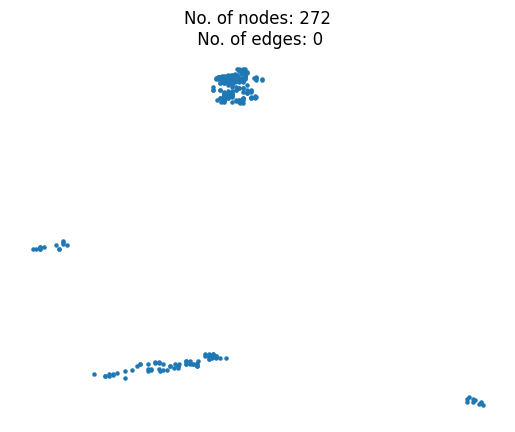

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

data_path = r"data/measurements.csv"
data = pd.read_csv(data_path)

G = nx.Graph()

for i, row in data.iterrows():
    G.add_node(i, pos=(row["X"], row["Y"]))
    
plt.title(f"No. of nodes: {G.number_of_nodes()}\n No. of edges: {G.number_of_edges()}")
nx.draw(G, pos=nx.get_node_attributes(G,"pos"), with_labels=False, node_size=5)
plt.show()

# k-NN Function

Can probably be optimized but im too lazy

In [2]:
def euclideanDistance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def knn(nodes, k=1):
    node_map = [a for a in range(len(nodes))]
    for i in range(len(nodes)):
        distances = []
        for j in range(len(nodes)):
            distances.append(euclideanDistance(nodes[i]["pos"], nodes[j]["pos"]))
        
        dist_map = {}
        for b, dist in enumerate(distances):
            dist_map[node_map[b]] = dist
            dist_map = dict(sorted(dist_map.items(), key=lambda item: item[1]))
            

        dist_map = list(dist_map.keys())[1:]
        for l in range(k):
            G.add_edge(i, dist_map[l])

# Edge creation

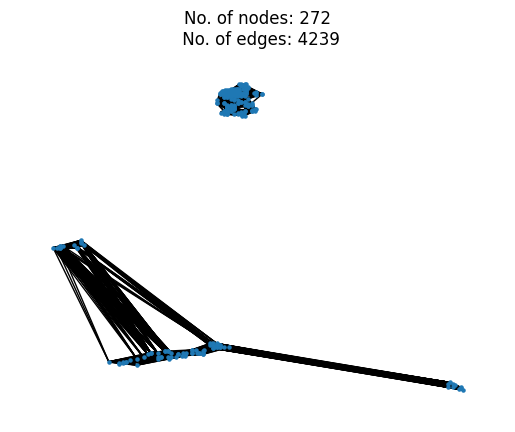

In [3]:
# Retrieve nodes + attributes (position data)
nodes = [G.nodes[i] for i in G.nodes]
k = 25
knn(nodes, k)

plt.title(f"No. of nodes: {G.number_of_nodes()}\n No. of edges: {G.number_of_edges()}")
nx.draw(G, pos=nx.get_node_attributes(G,"pos"), with_labels=False, node_size=5)
plt.show()

# k-NN function (Mark solution)

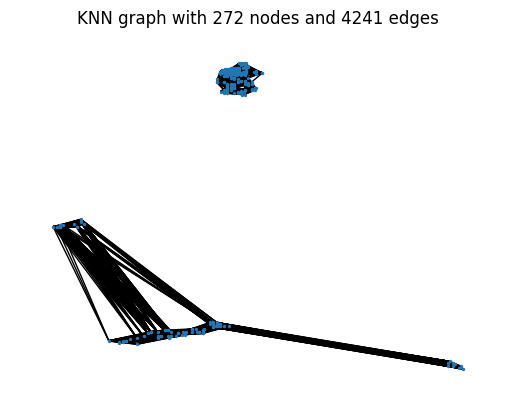

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import cKDTree
import numpy as np

def create_graph(df, k):
    G = nx.Graph()

    # add nodes
    for i, (index, row) in enumerate(df.iterrows()):
        G.add_node(i, pos=(row['X'],row['Y']), height=row['Z'], bio=row['bio'])

    #add edges
    nA =  np.array(list(zip(df.X, df.Y)))
    atree = cKDTree(nA)
    distances, neighbors = atree.query(nA, k=k+1)
    for neigh, dist in zip(neighbors,distances):
        for n, d in zip(neigh[1:],dist[1:]):
            G.add_edge(neigh[0], n, length=d)

    plt.figure()
    plt.title("KNN graph with {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
    nx.draw(G, pos=nx.get_node_attributes(G,'pos'), node_size=2)
    

create_graph(data, k)